<h1>Getting started with TensorFlow</h1>
<p>The following notebook assumes limited to no knowledge of TensorFlow, but it will require basic Python literacy and for the TensorFlow, Numpy, and Matplotlib modules to be installed (They should be unless you maliciously uninstalled them.)</p>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

<h2>Lesson Goals:</h2>
<ol>
    <li>Understanding Machine Learning Models as Function Approximators.</li>
    <li>Defining ML Models in TensorFlow.</li>
    <li>Training ML Models.</li>
</ol>
<a name="FunctionApproximator"></a>
<h3>Understanding Machine Learning Models as Function Approximators</h3>
<p>In general, most ML models are made with a very simple purpose: to produce 'intelligent' output for a given problem. This is an over simplified way of thinking of things, but it reveals some of our key goals: we want to make a model which produces output we like based on a set of input(s). In this sense, we can imagine our ML model as a universal function approximator: something which mimics the output we would like given a set of examples. For this lesson, we will start by loading a set of data and making a model which can accurately predict values for our unknown function.</p>
<h3>Loading the data</h3>
<p>We begin by using Python's pickle module to load the binary data file containing our unknown function's input and output examples.</p>

In [2]:
import pickle
file_name = 'data.p'
data = None
with open(file_name, 'rb') as out_file:
    data = pickle.load(out_file)
if data is not None:
    print('Loaded data from {}.\nData:{}'.format(file_name, data))

Loaded data from data.p.
Data:{'inputs': array([27.25, 37.25,  8.75, 43.75, 32.75, 16.5 , 49.75,  7.5 , 45.25,
        4.75, 41.25, 39.  , 21.25, 48.5 ,  2.25, 33.25, 27.25, 12.  ,
       32.25, 42.75, 25.75, 17.75, 12.25, 49.75, 33.  , 27.75,  4.5 ,
        6.25,  1.  , 16.  , 38.75,  8.75, 38.75, 15.75, 36.25,  2.25,
       27.  ,  9.75, 36.25, 38.  , 45.25, 42.75, 47.75,  1.  , 12.75,
       21.25, 10.25, 27.5 , 21.5 , 38.25, 38.75, 28.25, 37.5 , 47.5 ,
       50.  , 42.25, 11.  ,  6.25, 39.75,  9.75, 48.25, 35.5 ,  0.  ,
       32.5 ,  3.75, 28.75, 13.5 , 41.75, 34.75, 50.  , 48.75, 43.75,
       12.  , 12.  ,  0.25, 37.  , 25.5 , 35.75, 48.75, 32.75, 31.5 ,
        1.25, 38.  , 18.  ,  1.5 , 27.75, 10.5 , 30.25, 16.  ,  9.75,
       16.5 , 50.  ,  1.25, 10.75, 12.5 , 29.25, 24.5 , 44.5 , 39.  ,
       38.75]), 'outputs': array([-14.16095605,  33.55603166,  -6.83239973,  42.57488059,
         7.68046934, -11.58955145,  43.28523595,   2.59976488,
        13.505953  ,   0.17861023, -

<p>The previous code should print out the data for our inputs and outputs, but it would probably be helpful to display the data on a graph so we can get a better idea of what kind of function we are trying to model. The following code plots our data as a series of red points.</p>

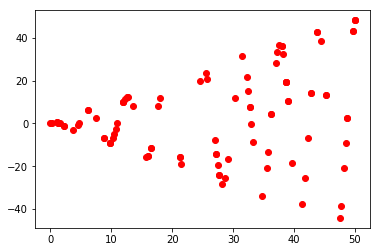

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data['inputs'], data['outputs'], 'ro')
plt.show()

<p>Since we have a set of input/output examples showing the expected output of our model, we could classify this ML problem as a <i>supervised learning</i> problem. In this case, we know that the output of our model should closely match that of the graph above. In order to determine which models we use to approximate this function are better, we will need to define a loss function to quantify how far off our model is. For continuous, regression type problems like this, a common loss function is to average the squares of the differences between the true value (denoted $y$) and the approximated value (denoted $\hat{y}$).</p>
$$loss=\frac{1}{n}\sum_0^n{(y_i-\hat{y_i})^2}$$
<p>This is often referred to as the Mean Squared Error (MSE).</p>

In [4]:
def MSE(ys,ys_approx):
    loss = 0
    for y, y_approx in zip(ys, ys_approx):
        loss += (y - y_approx) ** 2
    return loss/len(ys)

<h3>Linear Approximation</h3>
<p>We can try simply approximating our model using the slope-intercept formula:</p>
$$y = m*x + b$$
<p>Try to find best line of fit possible (lowest loss). Do not spend more than 5 minutes on this portion.</p>

Loss for function approximation:  1568.109186105218


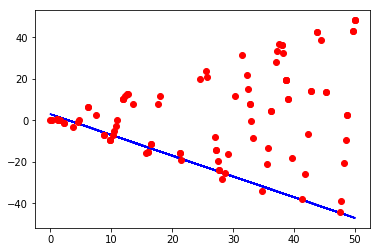

In [5]:
m = -1
b = 3

y = lambda x: m * x + b
print('Loss for function approximation: ', MSE(data['outputs'], y(data['inputs'])))

plt.plot(data['inputs'], y(data['inputs']), 'b-')
plt.plot(data['inputs'], data['outputs'], 'ro')
plt.show()

<p>We may  have managed to find a line which works, but in practice, we do not want to have to figure out the ideal values for $m$ or $b$. This is what we have ML and gradient descent for. Next, we will set up a simple linear approximator which we will train with TensorFlow. The following code begins by reformating our data so that we have 100 individual elements that are converted to 32 bit floats. For this exercise, we will treat each x,y pair as its own separate example for our model to train on.</p>

In [6]:
# Format the data to a consistent shape for TensorFlow
keras_inputs = np.expand_dims(data['inputs'], axis=-1).astype(np.float32)
keras_outputs = np.expand_dims(data['outputs'], axis=-1).astype(np.float32)
# Now the shape of our data is (100, 1) instead of (100).
# We can treat each individual element as its own example
# to train our Machine Learning model.

<p>Next, we create our actual TensorFlow model using the TensorFlow.keras API. This simplifies some of the code we have to write by hand so we can focus more on the Machine Learning aspects of the problem. We start by creating a sequential model  which means that the layers we add feed their outputs as the inputs of the next layer. Here we only add one layer with a single output and no activation function. This effectively gives us a linear approximator like what we made by hand previously.</p>

In [7]:
model = keras.Sequential()
model.add(layers.Dense(1, input_shape=(1,), activation=None))

Instructions for updating:
Colocations handled automatically by placer.


<p>With our model created, we can now fetch what values it predicted for our inputs by calling model.predict. We then plot the data below.</p>

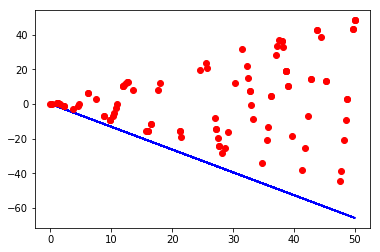

In [8]:
results = model.predict(keras_inputs)
plt.plot(data['inputs'], results[:,0], 'b-')
plt.plot(data['inputs'], data['outputs'], 'ro')
plt.show()

<p>That wasn't too bad, but we still want to see how good or bad our model predicts the data. To do that, we need to compile our model and tell it what metrics it uses to assess its performance. Additionally, when we compile the model, we specify an optimizer. The optimizer serves to calculate how loss determines what variables need to change with respect to our model's performance. We will come back and revisit the specifics of the optimizer later.</p>

In [9]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=0.000001))
loss = model.evaluate(keras_inputs, keras_outputs, verbose=0)
print('Mean Squared Error for this model:', loss)

Instructions for updating:
Use tf.cast instead.
Mean Squared Error for this model: 2530.71046875


<p>Now that we can user TensorFlow to calculate the losses of our model, we will try to train our model to minimize this loss function and find the ideal values of $m$ and $b$. The TensorFlow Keras API makes this pretty simple. All we need to do (after we have compiled our model) is to call model.fit with our training inputs and outputs. We can additionally set how many epochs our model trains for. The number of epochs controls how many times the model trains over the whole data set. Let's see what the results are after we train the model for 1 epoch.</p>

In [10]:
model.fit(keras_inputs, keras_outputs, epochs=100, batch_size=30, verbose=0)
loss = model.evaluate(keras_inputs, keras_outputs, verbose=0)
print('Mean Squared Error for this model:', loss)

Instructions for updating:
Use tf.cast instead.
Mean Squared Error for this model: 875.3626708984375


<h3>Better prediction?</h3>
<p>We can see the results of our trained model predicting the data below, but it seems that even if we trained our model perfectly, it still falls short of accurately modeling our data. This is because our data and the function we are trying to approximate is not linear. In order to make our ML model more accurate, we will use Neural Networks with nonlinear transformations/activations.</p>

In [ ]:
results = model.predict(keras_inputs)
plt.plot(data['inputs'], results[:,0], 'b-')
plt.plot(data['inputs'], data['outputs'], 'ro')
plt.show()